### Кейсовое задание ###
### Исследование данных и поиск инсайтов (Data Analyst, Ml Engineer) в сфере науки и образования


## Data Fields ##
•	children — количество детей в семье

•	days_employed — общий трудовой стаж в днях

•	dob_years — возраст клиента в годах

•	education — уровень образования клиента

•	education_id — идентификатор уровня образования

•	family_status — семейное положение

•	family_status_id — идентификатор семейного положения

•	gender — пол клиента

•	income_type — тип занятости

•	debt — имел ли задолженность по возврату кредитов

•	total_income — ежемесячный доход

•	purpose — цель получения кредита


## Подключение библиотек и скриптов ##

In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
 
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
 
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
 
    return df

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Пути к директориям и файлам ##

In [542]:
DATASET_PATH = './data.csv'
data = pd.read_csv(DATASET_PATH)

## Ознакомление с датасетом и переменными ##

In [543]:
data = reduce_mem_usage(data) ##уменьшение размерности датасета

Memory usage of dataframe is 1.97 MB
Memory usage after optimization is: 0.37 MB
Decreased by 81.1%


In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int8    
 1   days_employed     19351 non-null  float32 
 2   dob_years         21525 non-null  int8    
 3   education         21525 non-null  category
 4   education_id      21525 non-null  int8    
 5   family_status     21525 non-null  category
 6   family_status_id  21525 non-null  int8    
 7   gender            21525 non-null  category
 8   income_type       21525 non-null  category
 9   debt              21525 non-null  int8    
 10  total_income      19351 non-null  float32 
 11  purpose           21525 non-null  category
dtypes: category(5), float32(2), int8(5)
memory usage: 381.2 KB


In [545]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.672852,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.640625,покупка жилья
1,1,-4024.803711,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.015625,приобретение автомобиля
2,0,-5623.422852,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.953125,покупка жилья
3,3,-4124.747070,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.562500,дополнительное образование
4,0,340266.062500,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078125,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316895,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.859375,операции с жильем
21521,0,343937.406250,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.812500,сделка с автомобилем
21522,1,-2113.346924,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.562500,недвижимость
21523,3,-3112.481689,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.046875,на покупку своего автомобиля


In [546]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.652344,43.293380,0.817236,0.972544,0.080883,1.674221e+05
std,1.381587,140827.046875,12.574584,0.548138,1.420324,0.272661,1.029714e+05
min,-1.000000,-18388.949219,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423584,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369507,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095947,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.406250,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Работа с признаками/переменными

### Children ##

In [547]:
data['children'].dtype

dtype('int8')

In [548]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

<AxesSubplot:title={'center':'Distribution of amount of children'}, xlabel='employers', ylabel='children'>

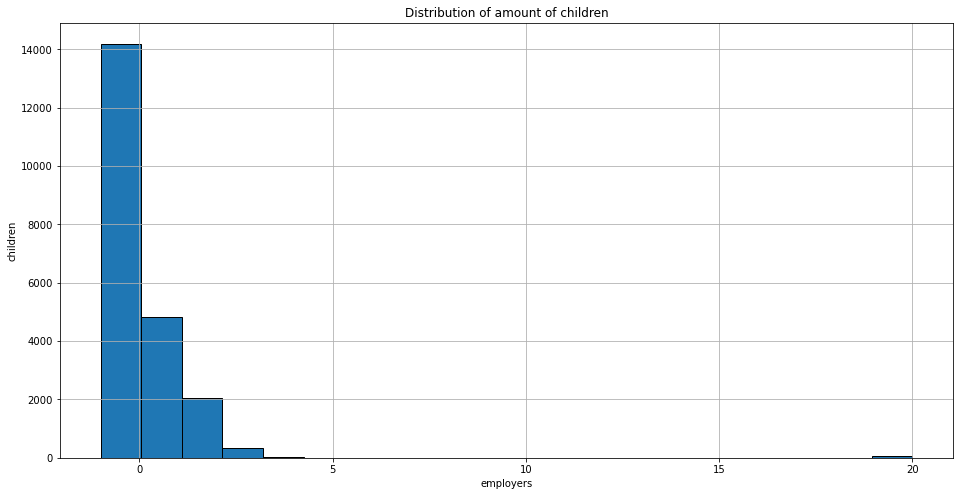

In [549]:
plt.figure(figsize=(16,8))
plt.ylabel('children')
plt.xlabel('employers')
plt.title('Distribution of amount of children')
data['children'].hist(bins=20,edgecolor='black')

*****Основной массив данных приходится на количество детей от 0 до 5. Количество детей, равное -1, является явной ошибкой, их,а также значения 20 имеет смысл обработать, как выбросы, заменив на моду (т.е. на ноль)*****

In [550]:
data.loc[(data['children'] < 0)|(data['children']>5),'children'] = 0
data['children'].value_counts()

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [551]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.470476,63046.652344,43.293380,0.817236,0.972544,0.080883,1.674221e+05
std,0.750534,140827.046875,12.574584,0.548138,1.420324,0.272661,1.029714e+05
min,0.000000,-18388.949219,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423584,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369507,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095947,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,401755.406250,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### DaysEmployed ###

In [552]:
data['days_employed']

0         -8437.672852
1         -4024.803711
2         -5623.422852
3         -4124.747070
4        340266.062500
             ...      
21520     -4529.316895
21521    343937.406250
21522     -2113.346924
21523     -3112.481689
21524     -1984.507568
Name: days_employed, Length: 21525, dtype: float32

<AxesSubplot:title={'center':'Distribution of days_employment'}, xlabel='Employment time', ylabel='Number of employments'>

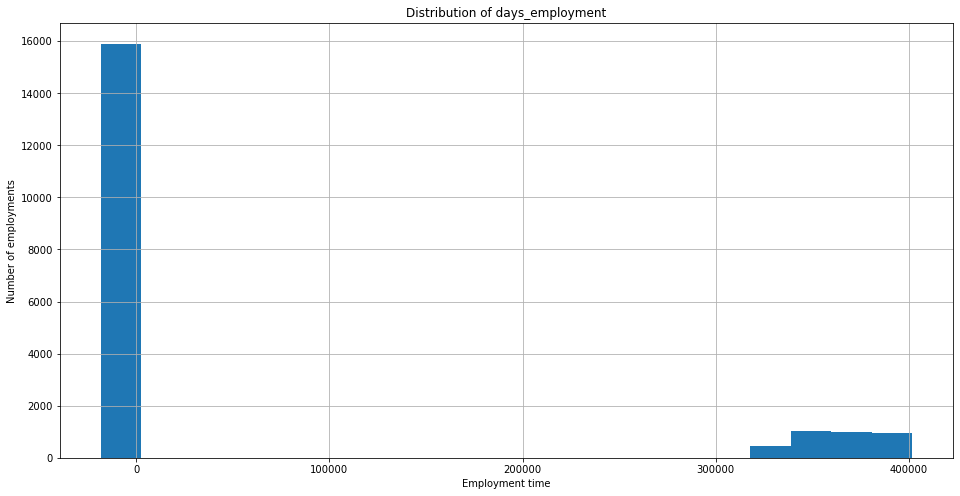

In [553]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of employments')
plt.xlabel('Employment time')
plt.title('Distribution of days_employment')
data['days_employed'].hist(bins=20)

***Наблюдается неадекватное распределение признака, что вероятно связано с большим количеством пропусков/выбросов, а также с наличием отрицательныйх значений***

In [554]:
data.loc[(data['days_employed']<0),'days_employed'] ### Наблюдаем 15 906 отрицательных значений

0       -8437.672852
1       -4024.803711
2       -5623.422852
3       -4124.747070
5        -926.185852
            ...     
21519   -2351.431885
21520   -4529.316895
21522   -2113.346924
21523   -3112.481689
21524   -1984.507568
Name: days_employed, Length: 15906, dtype: float32

In [555]:
data.loc[(data['days_employed']<0),'days_employed'] *= -1 ### преобразуем к положительным

***Еще на этапе ознакомления с датасетом было выявлено большое количество пропусков в данном признаке. Их требуется обработать***

In [556]:
data['days_employed'].isna().sum() #2174 пропуск

2174

In [557]:
data.loc[data['days_employed'].isnull()==True,'days_employed'] = data['days_employed'].median() #Учитывая признак и характер его распредления имеет смысл заменить пропуски на медиану

***Оценить количество выбросов можно с помощью построения боксплотов***

<AxesSubplot:xlabel='days_employed'>

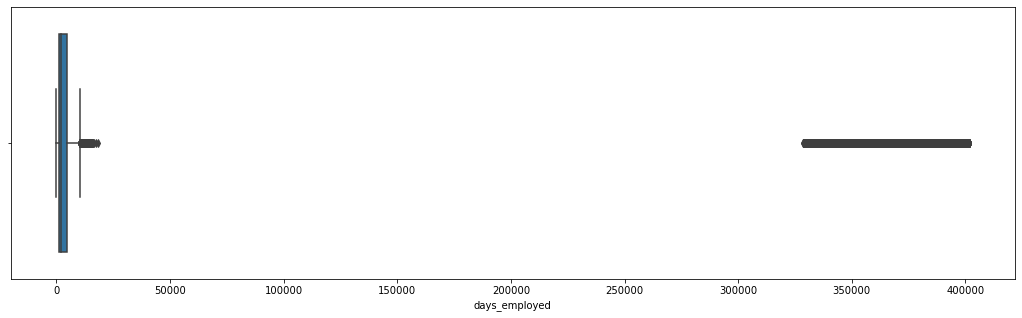

In [558]:
plt.figure(figsize=(18,5))
plt.xlabel('Employment time')
sns.boxplot(data['days_employed'], whis=1.5)

***Судя по боксплотам при обработке выбросов в данных показателях имеет смысл воспользоваться межквартильным размахом и заменой на медиану***

In [559]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.470476,60377.238281,43.293380,0.817236,0.972544,0.080883,1.674221e+05
std,0.750534,133258.687500,12.574584,0.548138,1.420324,0.272661,1.029714e+05
min,0.000000,24.141634,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1025.608154,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,2194.220459,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,4779.587891,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,401755.406250,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [560]:
days_employed_q_80 = np.quantile(data['days_employed'], q=0.8)
days_employed_q_025 = np.quantile(data['days_employed'], q=0.025)
days_employed_median = data['days_employed'].median()
data.loc[(data['days_employed']>days_employed_q_80)|(data['days_employed']<days_employed_q_025),'days_employed'] = days_employed_median

In [561]:
days_employed_q_80

7010.235449218751

<AxesSubplot:xlabel='days_employed'>

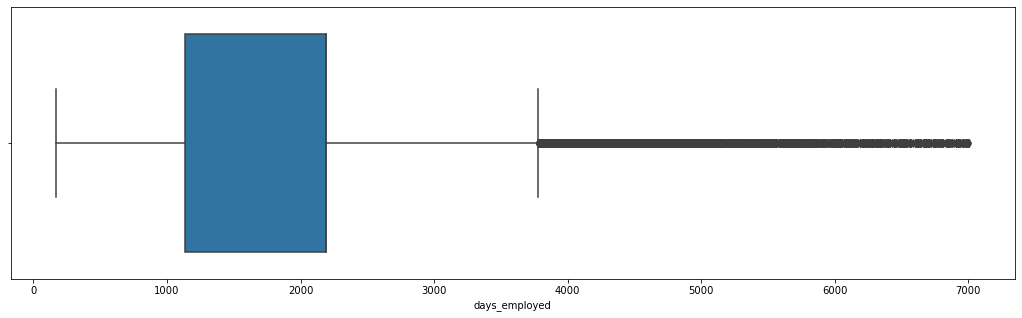

In [562]:
plt.figure(figsize=(18,5))
plt.xlabel('Employment time')
sns.boxplot(data['days_employed'], whis=1.5)

<AxesSubplot:title={'center':'Distribution of days_employment'}, xlabel='Employment time', ylabel='Number of employments'>

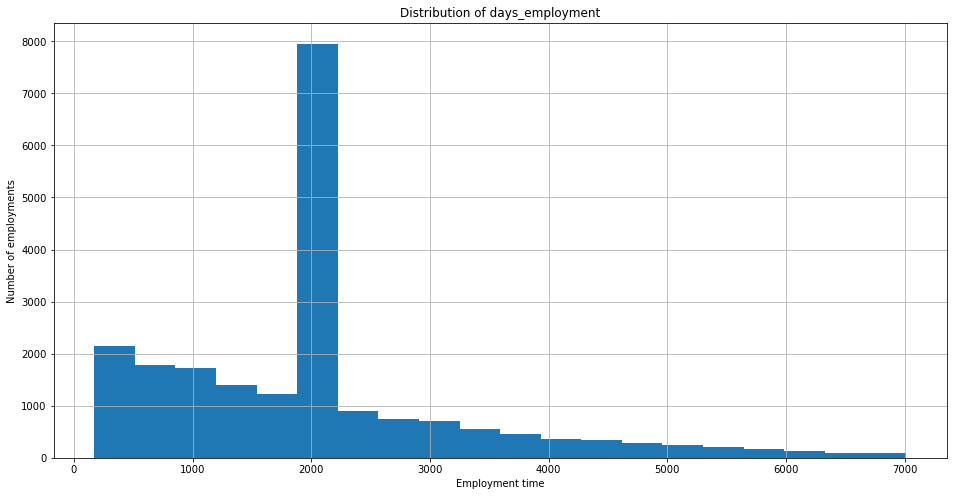

In [563]:
plt.figure(figsize=(16,8))
plt.ylabel('Number of employments')
plt.xlabel('Employment time')
plt.title('Distribution of days_employment')
data['days_employed'].hist(bins=20)

### Dob_years ###

In [564]:
data['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int8)

In [565]:
data['dob_years'].isna().sum()

0

***Нулевых значений для возраста не может быть***

In [566]:
data.loc[data['dob_years']==0,'dob_years'].shape[0] # Таких значений 101

101

***Приравняем данные значения к моде***

In [567]:
dob_years_mode = data['dob_years'].mode()[0]

In [568]:
data.loc[data['dob_years']==0,'dob_years'] = dob_years_mode
data.describe() # видим, что минимальным значением стал возраст 19 лет

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.470476,2078.340820,43.457607,0.817236,0.972544,0.080883,1.674221e+05
std,0.750534,1274.676514,12.231959,0.548138,1.420324,0.272661,1.029714e+05
min,0.000000,171.423920,19.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,1138.059082,34.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,2194.220459,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,2194.220459,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,5.000000,7010.022461,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<AxesSubplot:title={'center':'Distribution of age'}, xlabel='dob_years', ylabel='employees'>

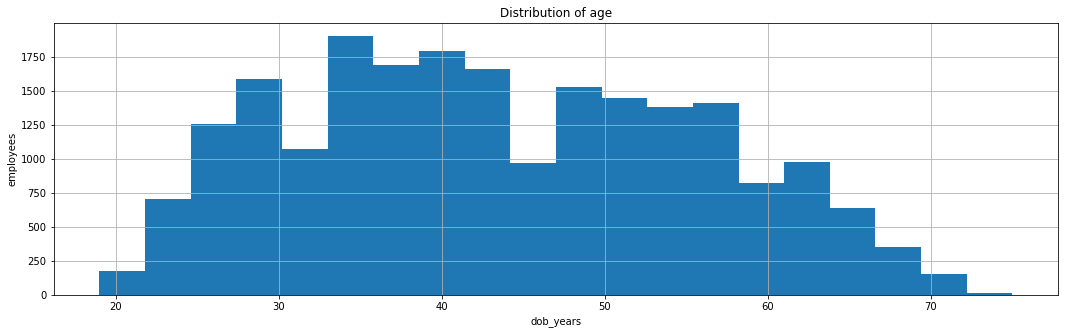

In [569]:
plt.figure(figsize=(18,5))
plt.xlabel('dob_years')
plt.ylabel('employees')
plt.title('Distribution of age')
data['dob_years'].hist(bins=20)


### Education ###

In [570]:
data['education'].sort_values().unique()

['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Начальное', ..., 'высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']
Length: 15
Categories (15, object): ['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ', ..., 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

In [571]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [572]:
data.loc[(data['education'] == 'СРЕДНЕЕ') | (data['education'] == 'Среднее'), 'education'] = 'среднее'
data.loc[(data['education'] == 'ВЫСШЕЕ') | (data['education'] == 'Высшее'), 'education'] = 'высшее'
data.loc[(data['education'] == 'НЕОКОНЧЕННОЕ ВЫСШЕЕ') | (data['education'] == 'Неоконченное высшее'), 'education'] = 'неоконченное высшее'
data.loc[(data['education'] == 'НАЧАЛЬНОЕ') | (data['education'] == 'Начальное'), 'education'] = 'начальное'
data.loc[(data['education'] == 'УЧЕНАЯ СТЕПЕНЬ') | (data['education'] == 'Ученая степень'), 'education'] = 'ученая степень'

In [573]:
data['education'].describe()

count       21525
unique          5
top       среднее
freq        15233
Name: education, dtype: object

### Education_id ###

In [574]:
data['education_id'].sort_values().unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [575]:
data['education_id'].describe()

count    21525.000000
mean         0.817236
std          0.548138
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: education_id, dtype: float64

### Family_status ###

In [576]:
data['family_status'].sort_values().unique()

['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']
Categories (5, object): ['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']

In [577]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [578]:
data['family_status'].describe()

count               21525
unique                  5
top       женат / замужем
freq                12380
Name: family_status, dtype: object

### Family_status_id ###

In [579]:
data['family_status_id'].sort_values().unique()

array([0, 1, 2, 3, 4], dtype=int8)

In [580]:
data['family_status_id'].describe()

count    21525.000000
mean         0.972544
std          1.420324
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: family_status_id, dtype: float64

### Gender ###

In [581]:
data['gender'].sort_values().unique() ## значение XNA аномальное

['F', 'M', 'XNA']
Categories (3, object): ['F', 'M', 'XNA']

In [582]:
data.loc[data['gender'] == 'XNA'] ## Такое значение только одно. 
##К сожалению, по косвенным признакам мы не можем определить пол данного сотрудника - поэтому можем заменить его на любое из двух.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600586,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.15625,покупка недвижимости


In [583]:
data.loc[data['gender'] == 'XNA','gender'] = 'M'
data['gender'].sort_values().unique() 

['F', 'M']
Categories (3, object): ['F', 'M', 'XNA']

### Income_type  ###

In [584]:
data.income_type.describe()

count         21525
unique            8
top       сотрудник
freq          11119
Name: income_type, dtype: object

In [585]:
data.income_type.sort_values().unique()

['безработный', 'в декрете', 'госслужащий', 'компаньон', 'пенсионер', 'предприниматель', 'сотрудник', 'студент']
Categories (8, object): ['безработный', 'в декрете', 'госслужащий', 'компаньон', 'пенсионер', 'предприниматель', 'сотрудник', 'студент']

### Debt ###

In [586]:
data.debt.describe()

count    21525.000000
mean         0.080883
std          0.272661
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: debt, dtype: float64

In [587]:
data.debt.value_counts()

0    19784
1     1741
Name: debt, dtype: int64

### total_income ###

In [588]:
data.total_income.describe() ## признак вещественный, необходимо привести к целочисленному, но сначала нужно заменить пропуски

count    1.935100e+04
mean     1.674221e+05
std      1.029714e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [589]:
data['total_income'].isna().sum()

2174

In [590]:
total_income_median = data['total_income'].median()

In [591]:
data.loc[data['total_income'].isnull() == True, 'total_income'] = total_income_median

In [592]:
data['total_income'].astype(int)

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21520    224791
21521    155999
21522     89672
21523    244093
21524     82047
Name: total_income, Length: 21525, dtype: int32

In [593]:
data.info() # Теперь тип целочисленный

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int8    
 1   days_employed     21525 non-null  float32 
 2   dob_years         21525 non-null  int8    
 3   education         21525 non-null  category
 4   education_id      21525 non-null  int8    
 5   family_status     21525 non-null  category
 6   family_status_id  21525 non-null  int8    
 7   gender            21525 non-null  category
 8   income_type       21525 non-null  category
 9   debt              21525 non-null  int8    
 10  total_income      21525 non-null  float32 
 11  purpose           21525 non-null  category
dtypes: category(5), float32(2), int8(5)
memory usage: 381.2 KB


###  Purpose ### 

In [594]:
data.purpose.describe()

count       21525
unique         38
top       свадьба
freq          797
Name: purpose, dtype: object

In [595]:
data.purpose.sort_values().unique() ## видно, что многие категории очень похожи друг на друга

['автомобили', 'автомобиль', 'высшее образование', 'дополнительное образование', 'жилье', ..., 'сделка с подержанным автомобилем', 'строительство жилой недвижимости', 'строительство недвижимости', 'строительство собственной недвижимости', 'сыграть свадьбу']
Length: 38
Categories (38, object): ['автомобили', 'автомобиль', 'высшее образование', 'дополнительное образование', ..., 'строительство жилой недвижимости', 'строительство недвижимости', 'строительство собственной недвижимости', 'сыграть свадьбу']

In [596]:
data.purpose.value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [597]:
data.loc[(data['purpose'] == 'автомобили') | (data['purpose'] == 'свой автомобиль')
         | (data['purpose'] == 'приобретение автомобиля') | (data['purpose'] == 'на покупку автомобиля')
         | (data['purpose'] == 'на покупку своего автомобиля') | (data['purpose'] == 'на покупку своего автомобиля')
         | (data['purpose'] == 'на покупку подержанного автомобиля'), 'purpose'] = 'автомобиль'
data.loc[(data['purpose'] == 'заняться высшим образованием')|(data['purpose'] == 'получение высшего образования')
         | (data['purpose'] == 'профильное образование')|(data['purpose'] == 'высшее образование') , 'purpose'] = 'образование'
data.loc[(data['purpose'] == 'строительство собственной недвижимости') | (data['purpose'] == 'строительство жилой недвижимости'), 'purpose'] = 'строительство недвижимости'
data.loc[(data['purpose'] == 'сыграть свадьбу') | (data['purpose'] == 'на проведение свадьбы'), 'purpose'] = 'свадьба'
data.loc[(data['purpose'] == 'сделка с подержанным автомобилем') | (data['purpose'] == 'сделка с автомобилем'), 'purpose'] = 'автомобиль'
data.loc[(data['purpose'] == 'заняться образованием')|(data['purpose'] == 'получение образования')
         | (data['purpose'] == 'дополнительное образование')|(data['purpose'] == 'получение дополнительного образования')
         , 'purpose'] = 'образование'
data.loc[(data['purpose'] == 'покупка жилья') | (data['purpose'] == 'недвижимость') | (data['purpose'] == 'покупка жилья для семьи')
         | (data['purpose'] == 'покупка недвижимости') | (data['purpose'] == 'покупка своего жилья') | (data['purpose'] == 'покупка жилой недвижимости')
         | (data['purpose'] == 'покупка жилья для сдачи') | (data['purpose'] == 'покупка коммерческой недвижимости')
         , 'purpose'] = 'жилье'
data.loc[(data['purpose'] == 'операции с коммерческой недвижимостью') | (data['purpose'] == 'недвижимость') | (data['purpose'] == 'операции со своей недвижимостью')
         | (data['purpose'] == 'операции с жильем'), 'purpose'] = 'операции с недвижимостью'

### Работа с дубликатами ###

In [598]:
data.drop_duplicates()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,2194.220459,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.640625,жилье
1,1,4024.803711,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.015625,автомобиль
2,0,5623.422852,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.953125,жилье
3,3,4124.747070,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.562500,образование
4,0,2194.220459,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.078125,свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316895,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.859375,операции с недвижимостью
21521,0,2194.220459,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.812500,автомобиль
21522,1,2113.346924,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.562500,жилье
21523,3,3112.481689,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.046875,автомобиль


### Создание новых датафреймов ###

In [599]:
data_frame_1 = pd.DataFrame(data[['education_id','education']])

In [600]:
data_frame_1.value_counts() #уникальные значения для датасета_1

education_id  education          
1             среднее                15233
0             высшее                  5260
2             неоконченное высшее      744
3             начальное                282
4             ученая степень             6
dtype: int64

In [601]:
data_frame_2 = pd.DataFrame(data[['family_status_id','family_status']])

In [602]:
data_frame_2.value_counts() #уникальные значения для датасета_2

family_status_id  family_status        
0                 женат / замужем          12380
1                 гражданский брак          4177
4                 Не женат / не замужем     2813
3                 в разводе                 1195
2                 вдовец / вдова             960
dtype: int64

### Визуализация ###

1. Распределение по количеству детей среди должников по кредиту;

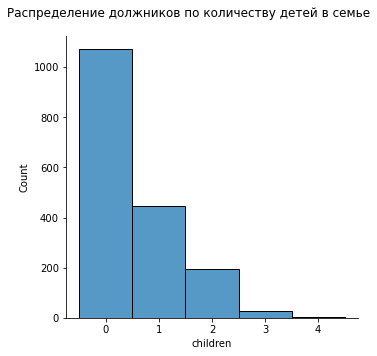

In [603]:
dis_debt_children = data.loc[data['debt'] == 1,'children']
dis_child = sns.displot(data=dis_debt_children,discrete=True)
dis_child.fig.subplots_adjust(top=.9)
dis_child.fig.suptitle('Распределение должников по количеству детей в семье')
plt.show()

2. Распределение по полу среди должников по кредиту;

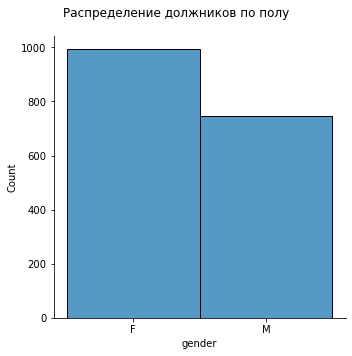

In [604]:
dis_debt_children = data.loc[data['debt'] == 1,'gender']
dis_child = sns.displot(data=dis_debt_children,discrete=True)
dis_child.fig.subplots_adjust(top=.9)
dis_child.fig.suptitle('Распределение должников по полу')
plt.show()

3.	3 наиболее популярные цели получения кредита для клиентов в возрасте 30+

In [673]:
age_purpose = data.loc[data['dob_years'] >=30,'purpose']

<BarContainer object of 3 artists>

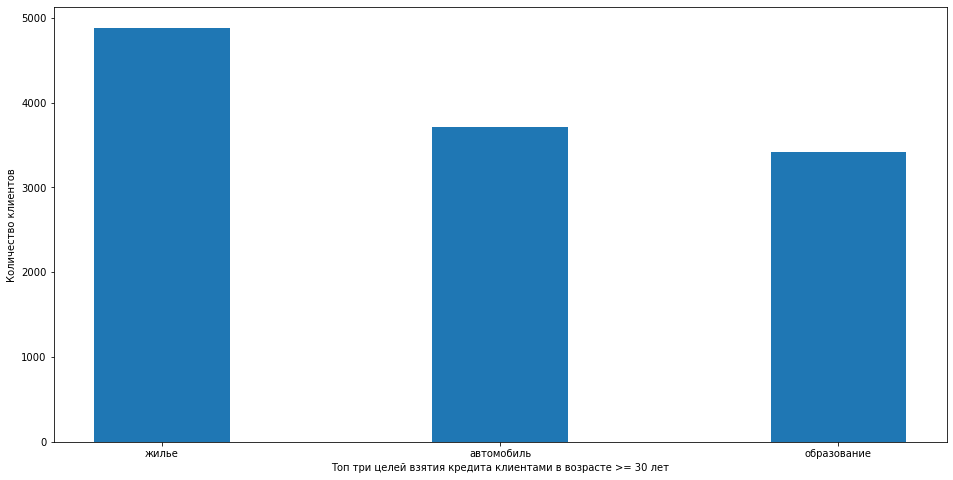

In [699]:
plt.figure(figsize = (16,8))
x = age_purpose.value_counts().head(3).keys()
y = age_purpose.value_counts().head(3).values
plt.xlabel('Топ три целей взятия кредита клиентами в возрасте >= 30 лет')
plt.ylabel('Количество клиентов')
plt.bar(x,y,width = 0.4)